# Data Science Project 

### NBA Player Performence in 2018

#### by Aaron Shyuu

### Description

As one of the most popular sports in the world, basketball offers entertainment and business opportunities. The NBA, arguably the top basketball league in the world, is watched by millions of people around the world. In order to satisfy fans and increase business growth, teams are constantly acquiring better players and coaches. Ultimately, every team has the same goal of making it to the finals and winning a championship. Knowing that 30 teams occupy the NBA, it is extremely challenging to reach the playoffs and all teams try to find an advantage through analytics. 

### Goal

As I am passionate about basketball and follow the Portland Trail Blazers closely as a fan so I have decided to focus on stats of NBA players in my project. With performence and salary data for players in the 2018 season, I will analyze various correlations and check my hypothesis. Furthermore, I will be breaking down player statistics with regression analysis and using prediction study techniques to predict salary. 

### Data Source

My NBA player dataset is obtained from “NBAStuffer”, a source that offers data from the basketball association and I made the dataset even more multivariate by adding a few attributes from the official NBA website. My data is in spreadsheet format (csv) and has 605 rows for its size. 

### Hypothesis

Does age have an impact on performence? My hypothesis is that offensive and defensive production will clearly drop off as players age. (ie. there is negative correlation between age and both offensive and defensive stats) Also, salary would increase as players get older in the NBA. This means that there is a positive correlation between salary and player's age. I also believe that Points per game and Age are good predictors for salary of players.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv file
df = pd.read_csv('nba.csv')  

In [3]:
df.head()

,FULL NAME,College,Country,Draft Year,TEAM,POS,AGE,GP,MPG,TOr,...,RPG,TRB%,APG,AST%,SPG,BPG,TOPG,ORTG,DRTG,Salary
0,Aaron Brooks,Oregon,USA,2007,Min,PG,33.0,32,5.9,0.130,...,0.5,5.2,0.6,15.0,0.19,0.00,0.34,103.1,100.4,"1,471,382"
1,Aaron Gordon,Arizona,USA,2014,Orl,SF,22.0,58,32.9,0.100,...,7.9,13.2,2.3,11.7,1.02,0.78,1.84,103.6,106.2,NaN
2,Aaron Harrison,Kentucky,USA,Undrafted,Dal,SG,23.0,9,25.9,0.038,...,2.7,5.7,1.2,6.7,1.00,0.22,0.33,87.9,100.8,"91,442"
3,Aaron Jackson,None,USA,Undrafted,Hou,F,31.0,1,34.5,0.092,...,3.0,4.9,1.0,4.0,0.00,0.00,1.00,91.3,101.6,"4,608"
4,Abdel Nader,Iowa State,Egypt,2016,Bos,SF,24.0,48,10.9,0.170,...,1.5,7.4,0.5,7.2,0.31,0.21,0.71,83.1,99.1,"1,167,333"


### Data Cleaning

In [4]:
# Removing excess data columns for analysis
dropCol = ["Country", "Draft Year", "DRTG", "ORTG","TOr","AST%","TRB%","GP", "FTA","3PA","2PA", "3PM", "2PM","2P%","3P%","FT%","TS%","eFG%"]
df = df.drop(dropCol, axis=1)

In [5]:
df.head()

,FULL NAME,College,TEAM,POS,AGE,MPG,FTM,PPG,RPG,APG,SPG,BPG,TOPG,Salary
0,Aaron Brooks,Oregon,Min,PG,33.0,5.9,7.997,2.3,0.5,0.6,0.19,0.00,0.34,"1,471,382"
1,Aaron Gordon,Arizona,Orl,SF,22.0,32.9,157.050,17.6,7.9,2.3,1.02,0.78,1.84,NaN
2,Aaron Harrison,Kentucky,Dal,SG,23.0,25.9,13.005,6.7,2.7,1.2,1.00,0.22,0.33,"91,442"
3,Aaron Jackson,None,Hou,F,31.0,34.5,1.000,8.0,3.0,1.0,0.00,0.00,1.00,"4,608"
4,Abdel Nader,Iowa State,Bos,SF,24.0,10.9,23.010,3.0,1.5,0.5,0.31,0.21,0.71,"1,167,333"


In [6]:
# Remove rows with Nan in any column
df = df.dropna(how='any',axis=0) 

# Remove duplicate rows - if any
# In the case where a players switches team mid-season 
df = df.drop_duplicates(keep=False)

I can comfortably remove any row where the column has missing values since my dataset is large with 600+ rows (ie. players) 

In [7]:
df.head()

,FULL NAME,College,TEAM,POS,AGE,MPG,FTM,PPG,RPG,APG,SPG,BPG,TOPG,Salary
0,Aaron Brooks,Oregon,Min,PG,33.0,5.9,7.997,2.3,0.5,0.6,0.19,0.00,0.34,"1,471,382"
2,Aaron Harrison,Kentucky,Dal,SG,23.0,25.9,13.005,6.7,2.7,1.2,1.00,0.22,0.33,"91,442"
3,Aaron Jackson,None,Hou,F,31.0,34.5,1.000,8.0,3.0,1.0,0.00,0.00,1.00,"4,608"
4,Abdel Nader,Iowa State,Bos,SF,24.0,10.9,23.010,3.0,1.5,0.5,0.31,0.21,0.71,"1,167,333"
6,Al Horford,Florida,Bos,C,31.0,31.6,93.960,12.9,7.4,4.7,0.60,1.08,1.83,"27,734,406"


### Components

Full Name -> categorical

College -> categorical

Team -> categorical

Position -> categorical

Age -> continuous numerical

MPG - minutes per game -> continuous numerical

FTM - free throws made -> continuous numerical

2PM - 2 pointers made -> continuous numerical

3PM - 3 pointers made -> continuous numerical

PPG - points per game -> continous numerical

RPG - rebounds per game -> coninuous numerical

APG - assists per game -> continuous numerical

SPG - steals per game -> continuous numerical

BPG - blocks per game -> continuous numerical

TOPG - turnovers per game -> continuous numerical


### Transforming Data Types

In [8]:
# Ensure types are appropriate 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 604
Data columns (total 14 columns):
FULL NAME    444 non-null object
College      444 non-null object
TEAM         444 non-null object
POS          444 non-null object
AGE          444 non-null float64
MPG          444 non-null float64
FTM          444 non-null float64
PPG          444 non-null float64
RPG          444 non-null float64
APG          444 non-null float64
SPG          444 non-null float64
BPG          444 non-null float64
TOPG         444 non-null float64
Salary       444 non-null object
dtypes: float64(9), object(5)
memory usage: 52.0+ KB


In [9]:
# Change type for salary
cols = df.columns
df[cols] = df[cols].replace({',':''},regex = True)
df['Salary'] = pd.to_numeric(df['Salary'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 0 to 604
Data columns (total 14 columns):
FULL NAME    444 non-null object
College      444 non-null object
TEAM         444 non-null object
POS          444 non-null object
AGE          444 non-null float64
MPG          444 non-null float64
FTM          444 non-null float64
PPG          444 non-null float64
RPG          444 non-null float64
APG          444 non-null float64
SPG          444 non-null float64
BPG          444 non-null float64
TOPG         444 non-null float64
Salary       444 non-null int64
dtypes: float64(9), int64(1), object(4)
memory usage: 52.0+ KB


In [11]:
# Shape of data
df.shape

(444, 14)

In [12]:
# Pay attention to continuous numerical variables 
df.describe()

,AGE,MPG,FTM,PPG,RPG,APG,SPG,BPG,TOPG,Salary
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,4.440000e+02
mean,26.189189,20.540766,80.963574,8.946171,3.619595,1.965541,0.663626,0.405405,1.184550,7.211737e+06
std,4.257011,9.269479,92.683241,5.967981,2.482407,1.786899,0.455988,0.398247,0.832945,7.672491e+06
min,19.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.608000e+03
25%,23.000000,13.700000,17.747250,4.400000,2.000000,0.700000,0.330000,0.140000,0.570000,1.471382e+06
50%,26.000000,21.150000,48.016000,7.700000,3.100000,1.400000,0.590000,0.280000,1.025000,3.505466e+06
75%,29.000000,27.925000,113.296000,12.700000,4.700000,2.725000,0.952500,0.532500,1.612500,1.095576e+07
max,41.000000,36.800000,623.766000,30.400000,16.000000,10.300000,2.350000,2.570000,5.040000,3.745715e+07


### EDA 

For EDA, we will explore various numerical and categorical variables to prepare for our main analysis. Furthermore, we will observe outliers and look at the distribution of all factors. 

(array([61., 80., 74., 65., 71., 60., 16.,  8.,  6.,  3.]),
 array([19. , 21.2, 23.4, 25.6, 27.8, 30. , 32.2, 34.4, 36.6, 38.8, 41. ]),
 <a list of 10 Patch objects>)

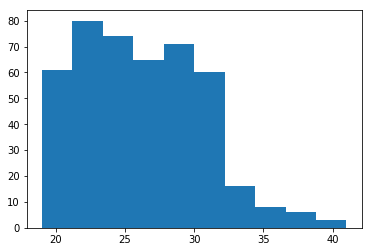

In [13]:
# histogram of AGE
plt.hist(df['AGE'],10)

This plot distribution is right skewed and not normally distributed. We notice that the majority of the players are 20 to 30 years of age so it appears that many players retire after 30.

/Users/aaronshyuu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


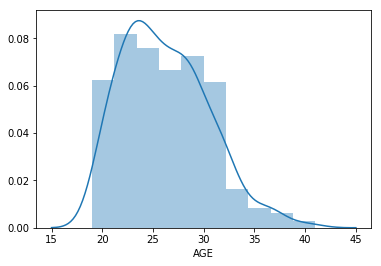

In [14]:
# pdfs
sns.distplot(df['AGE'], bins = 10)

(array([19., 31., 33., 48., 54., 56., 60., 53., 52., 38.]),
 array([ 0.5 ,  4.13,  7.76, 11.39, 15.02, 18.65, 22.28, 25.91, 29.54,
        33.17, 36.8 ]),
 <a list of 10 Patch objects>)

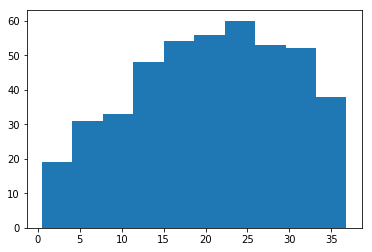

In [15]:
# histogram of MPG
plt.hist(df['MPG'],10)

This is a more balanced distribution than before and we see that most number of players play at around 20-25 mins per game.

/Users/aaronshyuu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


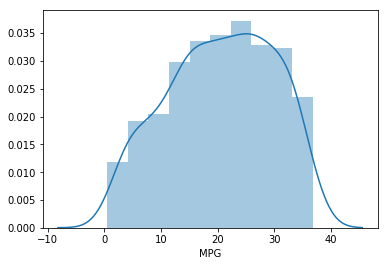

In [16]:
# pdfs
sns.distplot(df['MPG'], bins = 10)

(array([254.,  93.,  49.,  24.,   9.,   8.,   2.,   4.,   0.,   1.]),
 array([  0.    ,  62.3766, 124.7532, 187.1298, 249.5064, 311.883 ,
        374.2596, 436.6362, 499.0128, 561.3894, 623.766 ]),
 <a list of 10 Patch objects>)

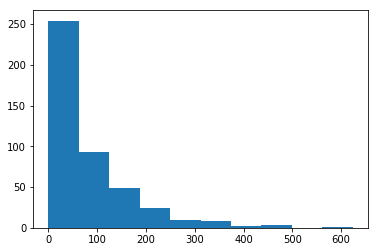

In [17]:
# histogram of FTM 
plt.hist(df['FTM'],10)

The distribution for free throw makes is right skewed. Some extremes are also on the right.

/Users/aaronshyuu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


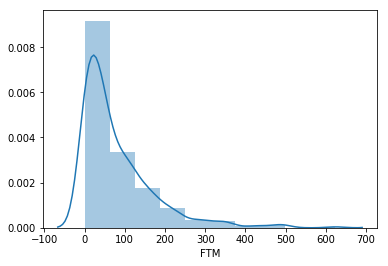

In [18]:
# pdfs
sns.distplot(df['FTM'], bins = 10)

(array([ 68., 105.,  93.,  56.,  56.,  31.,  13.,  13.,   7.,   2.]),
 array([ 0.  ,  3.04,  6.08,  9.12, 12.16, 15.2 , 18.24, 21.28, 24.32,
        27.36, 30.4 ]),
 <a list of 10 Patch objects>)

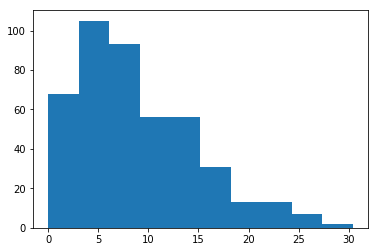

In [19]:
# histogram of PPG
plt.hist(df['PPG'],10)

Points per game appear to have an exponential distribution. Most players score 5-10 points.

/Users/aaronshyuu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


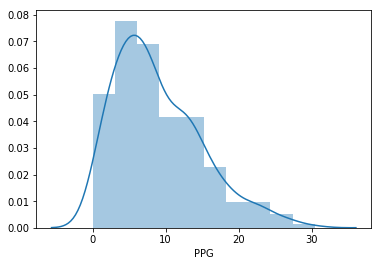

In [20]:
# pdfs
sns.distplot(df['PPG'], bins = 10)

(array([ 76., 155., 112.,  44.,  30.,  13.,   8.,   3.,   1.,   2.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

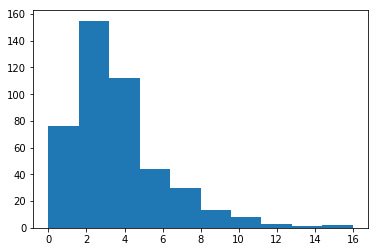

In [21]:
# histogram of RPG
plt.hist(df['RPG'],10)

Rebounds per game is expoentially distributed with most players grabbing only 2-4 rebounds per game.

/Users/aaronshyuu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


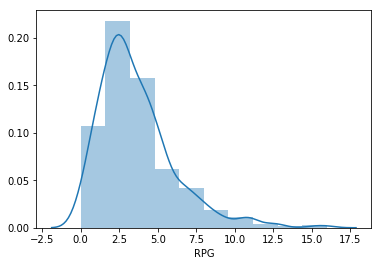

In [22]:
# pdfs
sns.distplot(df['RPG'], bins = 10)

(array([173., 125.,  51.,  40.,  22.,  16.,  10.,   4.,   1.,   2.]),
 array([ 0.  ,  1.03,  2.06,  3.09,  4.12,  5.15,  6.18,  7.21,  8.24,
         9.27, 10.3 ]),
 <a list of 10 Patch objects>)

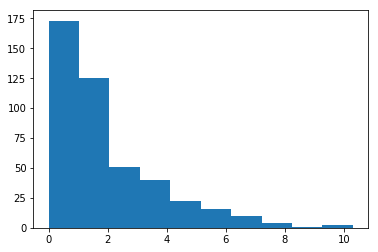

In [23]:
# histogram of APG
plt.hist(df['APG'],10)

/Users/aaronshyuu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


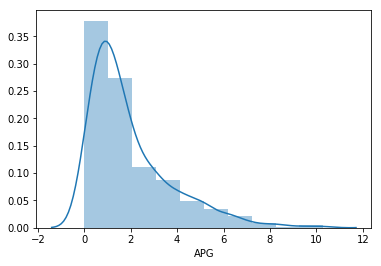

In [24]:
# pdfs
sns.distplot(df['APG'], bins = 10)

(array([77., 92., 96., 67., 56., 20., 19.,  9.,  7.,  1.]),
 array([0.   , 0.235, 0.47 , 0.705, 0.94 , 1.175, 1.41 , 1.645, 1.88 ,
        2.115, 2.35 ]),
 <a list of 10 Patch objects>)

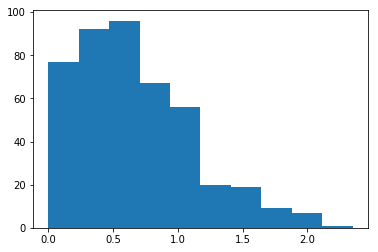

In [25]:
# histogram of SPG
plt.hist(df['SPG'],10)

/Users/aaronshyuu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


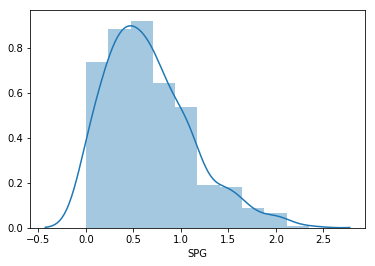

In [26]:
# pdfs
sns.distplot(df['SPG'], bins = 10)

(array([202., 125.,  53.,  27.,  18.,   9.,   5.,   2.,   1.,   2.]),
 array([0.   , 0.257, 0.514, 0.771, 1.028, 1.285, 1.542, 1.799, 2.056,
        2.313, 2.57 ]),
 <a list of 10 Patch objects>)

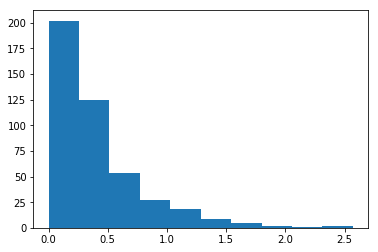

In [27]:
# histogram of BPG
plt.hist(df['BPG'],10)

/Users/aaronshyuu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


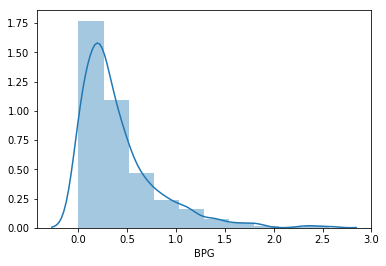

In [28]:
# pdfs
sns.distplot(df['BPG'], bins = 10)

(array([102., 118., 104.,  54.,  26.,  30.,   4.,   3.,   1.,   2.]),
 array([0.   , 0.504, 1.008, 1.512, 2.016, 2.52 , 3.024, 3.528, 4.032,
        4.536, 5.04 ]),
 <a list of 10 Patch objects>)

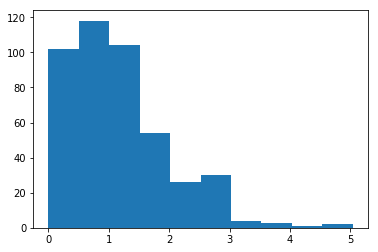

In [29]:
# histogram of TOPG
plt.hist(df['TOPG'],10)

/Users/aaronshyuu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


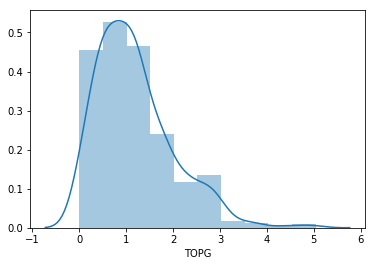

In [30]:
# pdfs
sns.distplot(df['TOPG'], bins = 10)

(array([226.,  67.,  40.,  36.,  28.,  16.,  19.,   7.,   4.,   1.]),
 array([4.60800000e+03, 3.74986260e+06, 7.49511720e+06, 1.12403718e+07,
        1.49856264e+07, 1.87308810e+07, 2.24761356e+07, 2.62213902e+07,
        2.99666448e+07, 3.37118994e+07, 3.74571540e+07]),
 <a list of 10 Patch objects>)

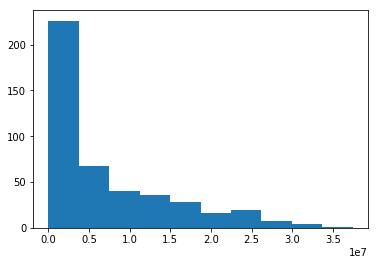

In [31]:
# histogram of Salary
plt.hist(df['Salary'],10)

/Users/aaronshyuu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


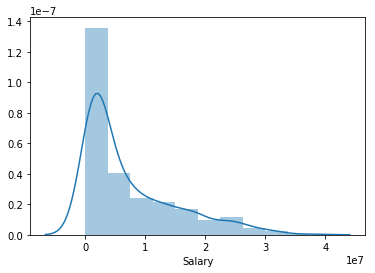

In [32]:
# pdfs
sns.distplot(df['Salary'], bins = 10)

### More Analysis...

In [33]:
# Count by category (categorical)
dist = df.groupby('College').size()

In [34]:
dist

College
Alabama                      1
American                     1
Arizona                     10
Arizona State                1
Arkansas                     4
Baylor                       3
Belmont                      1
Boston College               2
Bowling Green                1
Bucknell                     1
Butler                       2
California                   4
California-Los Angeles       2
California-Santa Barbara     1
Cincinnati                   4
Colorado                     4
Colorado State               1
Connecticut                  7
Creighton                    5
Davidson                     1
DePaul                       1
Duke                        14
Florida                      7
Florida State                5
Fresno State                 2
George Washington            1
Georgia                      2
Georgia Tech                 4
Gonzaga                      4
Harvard                      1
                            ..
Southern California          5


It's interesting to note that some of the most popular universities for NBA players include universities like Duke and UCLA.

In [35]:
# select all numerical variables
#df['Salary'] = df['Salary'].astype(float)
num = df.select_dtypes(include=['float64','int64'])
num.head()

,AGE,MPG,FTM,PPG,RPG,APG,SPG,BPG,TOPG,Salary
0,33.0,5.9,7.997,2.3,0.5,0.6,0.19,0.00,0.34,1471382
2,23.0,25.9,13.005,6.7,2.7,1.2,1.00,0.22,0.33,91442
3,31.0,34.5,1.000,8.0,3.0,1.0,0.00,0.00,1.00,4608
4,24.0,10.9,23.010,3.0,1.5,0.5,0.31,0.21,0.71,1167333
6,31.0,31.6,93.960,12.9,7.4,4.7,0.60,1.08,1.83,27734406


### How does age affect performence? Is my hypothesis correct?

#### Correlations

In [36]:
correlations = num.corr()['AGE'][:]

In [37]:
correlations

AGE       1.000000
MPG       0.093752
FTM       0.000789
PPG       0.061834
RPG       0.016609
APG       0.072198
SPG      -0.001622
BPG      -0.007968
TOPG      0.022961
Salary    0.302550
Name: AGE, dtype: float64

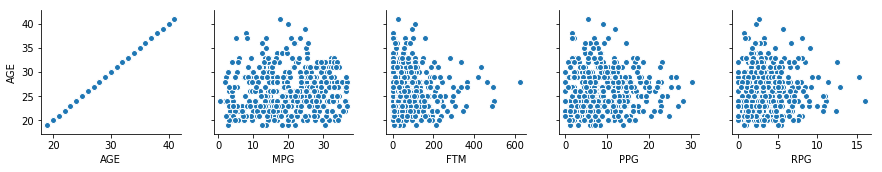

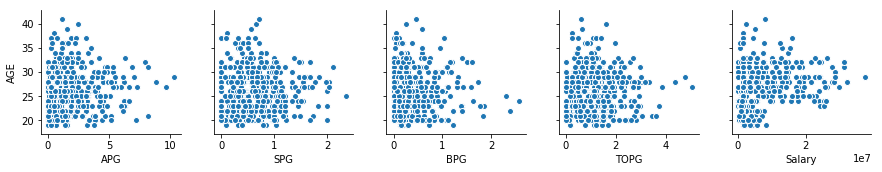

In [38]:
# correlation plots with pairplot
for i in range(0,len(num.columns),5):
    sns.pairplot(num,y_vars=['AGE'],x_vars=num.columns[i:i+5])

Here, I am using Age as my target variable. We see that age has a weak negative correlation with many other numerical factors like BPG and SPG. Clearly, age has the strongest correlation to salary as backed up by both the correlation coefficient and the Salary vs. Age plot.

#### Now that we know about the correlations, let's analyze based on position of players...

#### Age vs. Points per game

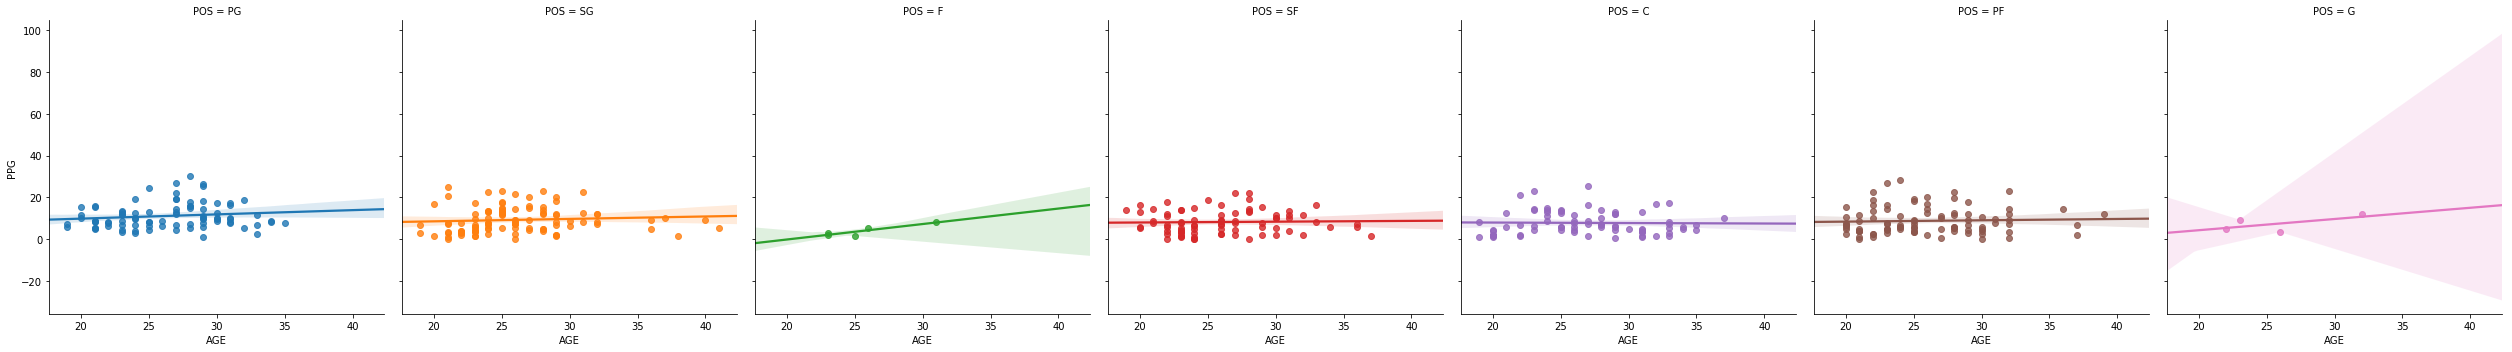

In [39]:
sns.lmplot("AGE", "PPG", df, col="POS",hue="POS")

Hypothsis is incorrect. There is no strong correlation between age and points per game of a player no matter their position. However, it's interesting to see that once a player reaches ~30 years old, their performence drops off as seen above. The colored area are confidence intervals and bootstraped in Seaborn. It makes sense that the ends are wider since you are further away from known data.

#### Age vs. Rebounds per game

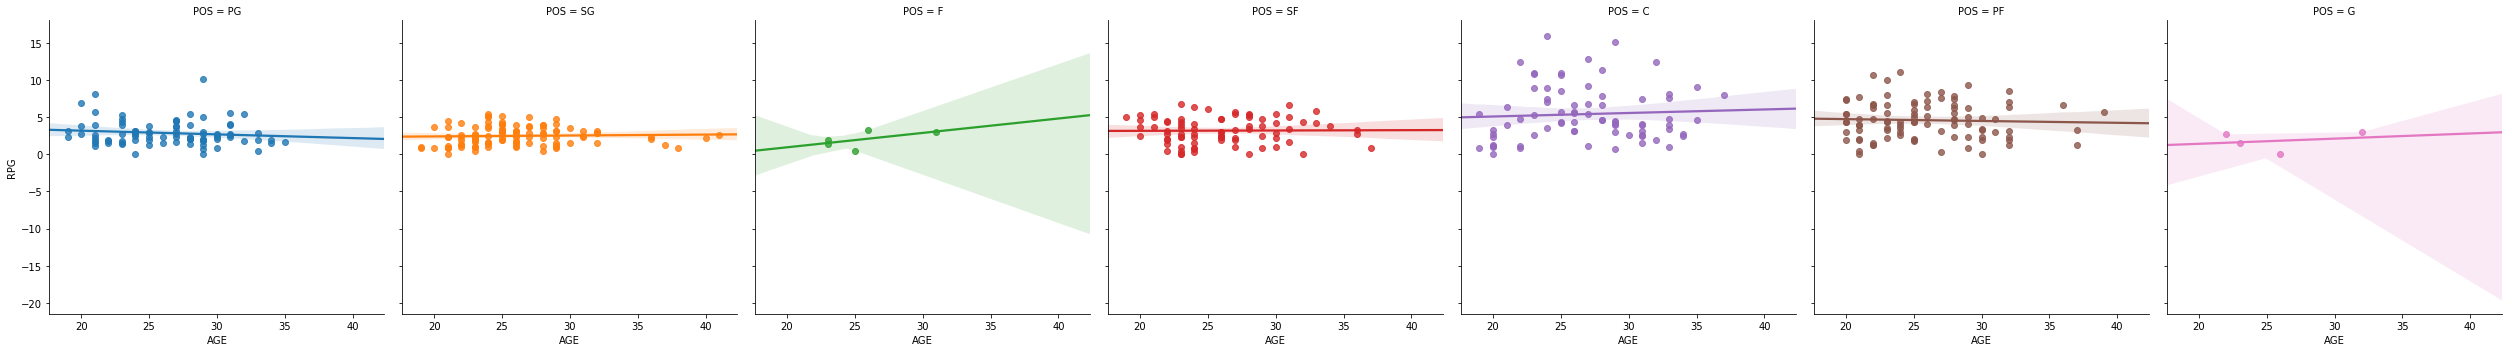

In [40]:
sns.lmplot("AGE", "RPG", df, col="POS",hue="POS")

Hypothesis can be verified by positions including point guard and power forward positions. It is certainly not a strong negative correlation but correlation can be seen.

#### Age vs. Salary

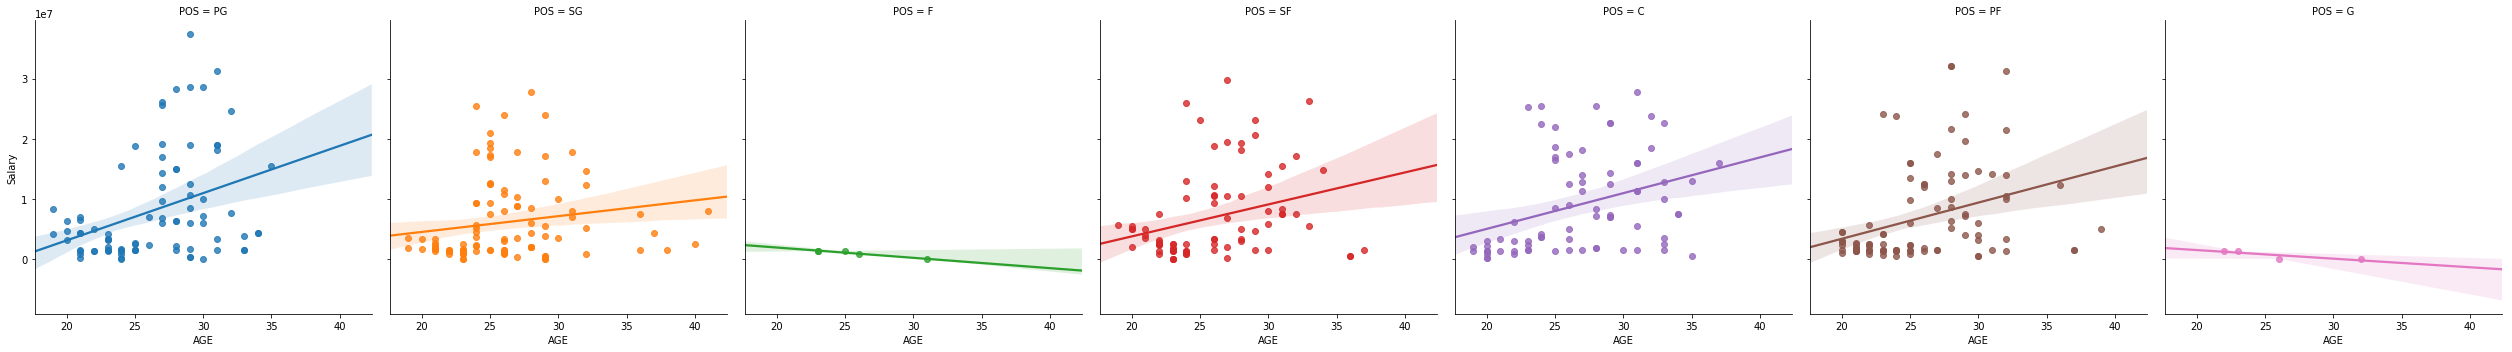

In [41]:
sns.lmplot("AGE", "Salary", df, col="POS",hue="POS")

Hypothesis is strongly supported for all five basketball positions. Age and salary has strong positive correlation so as players get older, they make more money.

In [42]:
correlation = num.corr()['Salary'][:]

In [43]:
correlation

AGE       0.302550
MPG       0.549090
FTM       0.535197
PPG       0.601655
RPG       0.488176
APG       0.430501
SPG       0.373342
BPG       0.324305
TOPG      0.499764
Salary    1.000000
Name: Salary, dtype: float64

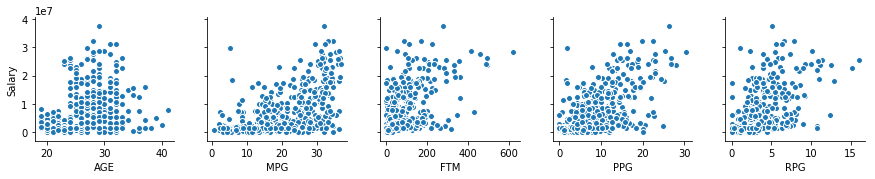

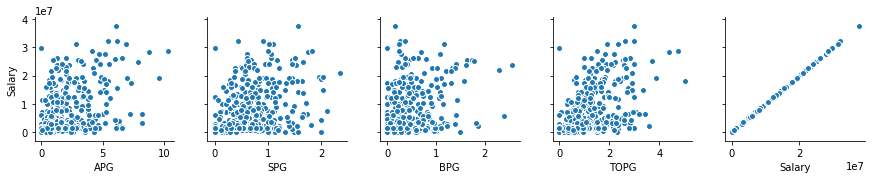

In [44]:
for i in range(0,len(num.columns),5):
    sns.pairplot(num,y_vars=['Salary'],x_vars=num.columns[i:i+5])

Here, we get an indication to different correlations using the target variable Salary. The plot supports the correlation values we obtained above. For example, we can see that Salary and Age has a weaker correlation since the variance is larger as seen on the plot. On the other hand, it is very interesting to see that Salary and Points per game has quite a strong positive correlation. In other words, the plot suggests that perhaps the more points a player scores, the more they get paid. 

#### Salary vs. Points per game

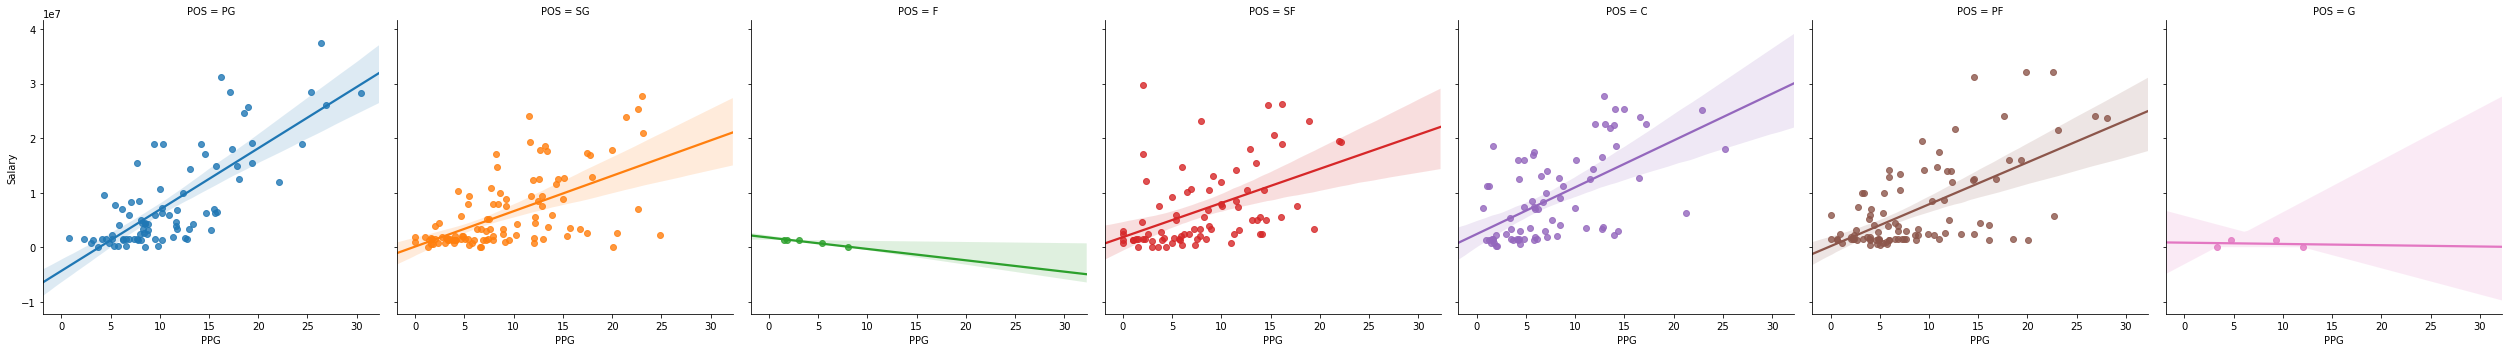

In [45]:
sns.lmplot("PPG", "Salary", df, col="POS",hue="POS")

Analyzing by position, it is interesting to see that this postive correlation is strong for all positions. Specifically, this positive correlation is strongest for point guards and centers. This means that point guards or centers that scores a lot in the NBA receive the most salary.

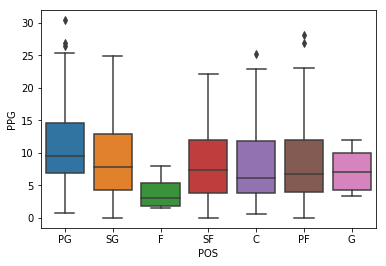

In [46]:
# box-plot for PPG vs. Position
box = sns.boxplot(x='POS',y='PPG',data=df)

From the PPG vs. Position box-plot, we notice that on average, point guards and shooting guard score more points (at about 10 PPG) than forwards and centers. It is also evident that PG and SG have great variance in comparison.

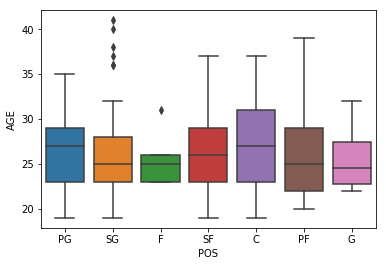

In [47]:
# box-plot for Age vs. Position
box2 = sns.boxplot(x='POS',y='AGE',data=df)

Looking at the mean and variance from the Age vs. Position box-plot, we see that center and power forward positions are more forgiving in terms of age. On the other hand, point guards and shooting guards no longer have contracts in the NBA once they start getting close to thirty years old. 

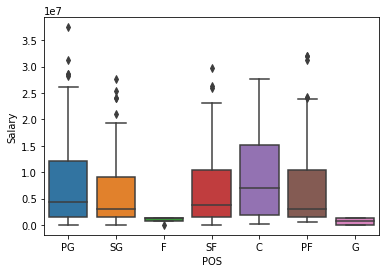

In [48]:
# box-plot for Salary vs. Position
box3 = sns.boxplot(x='POS',y='Salary',data=df)

For salary by position, the center position stands out with higher mean salary when compared to other positions. The point guard position has mean salary at about 5 million dollars as shown. The varaince appears greatest for center and point guard positions.

### Regression Analysis

#### Now we add Regreesion Lines...

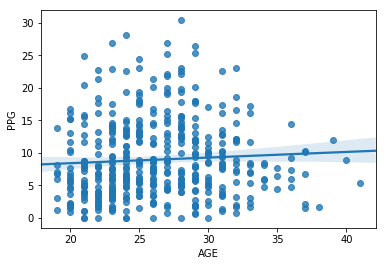

In [49]:
sns.regplot(df['AGE'],df['PPG'])

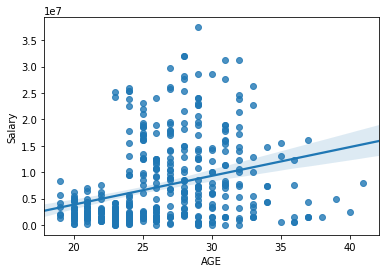

In [50]:
sns.regplot(df['AGE'],df['Salary'])

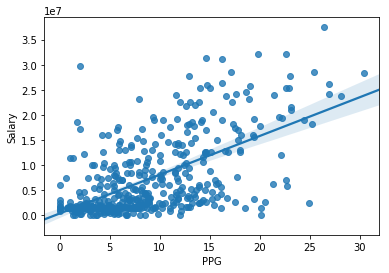

In [51]:
sns.regplot(df['PPG'],df['Salary'])

Looking at the regreesion lines and strength of correlation, it is clear that point per games and salary has strong correlation. Therefore, we will be most interested in that in our analysis.

In [52]:
%matplotlib inline
import scipy as sp
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from bokeh.models import Jitter

from sklearn import linear_model

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import RFE

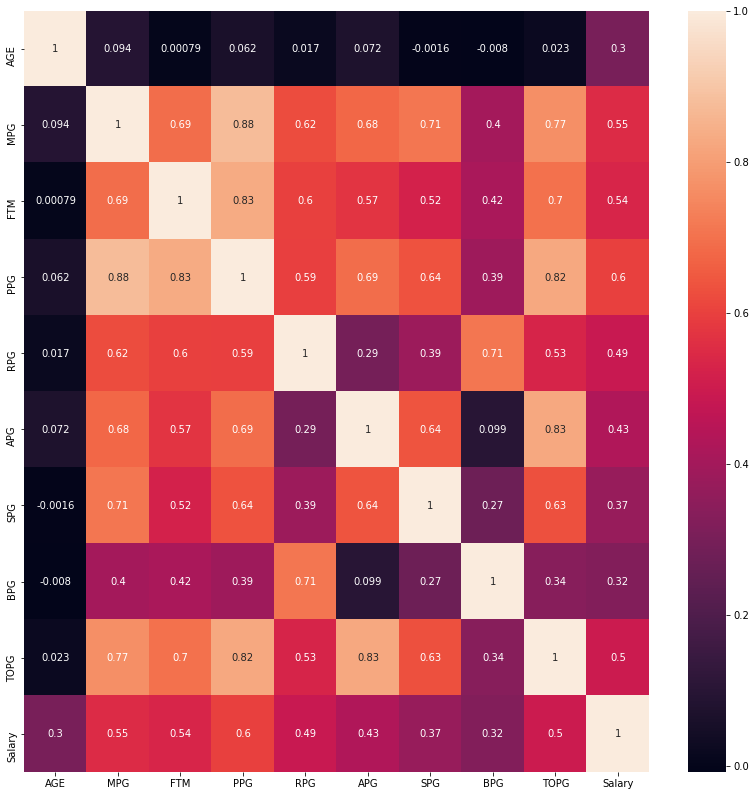

In [53]:
plt.figure(figsize =(14,14))
sns.heatmap(df.corr(),annot=True)

In [54]:
# Drop columns that I don't need
df = df.drop(columns = ['FULL NAME','College','POS','TEAM'])

from sklearn import linear_model
from sklearn.linear_model import Ridge

In [55]:
model_trn = smf.ols(formula = 'Salary~AGE+MPG+FTM+PPG+RPG+APG+SPG+BPG+TOPG',data = df).fit()
model_trn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     42.30
Date:                Sat, 10 Aug 2019   Prob (F-statistic):           4.21e-54
Time:                        16:04:52   Log-Likelihood:                -7528.5
No. Observations:                 444   AIC:                         1.508e+04
Df Residuals:                     434   BIC:                         1.512e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.261e+07   1.77e+06     -7.123      0.000   -1.61e+07   -9.13e+06
AGE         4.879e+05   6.44e+04      7.581      0.000    3.61e+05    6.14e+05
MPG        -4.778e+04   7.24e+04     -0.660      0.510    -1.9e+05    9.45e+04
FTM         5816.2080   5617.896      1.035      0.301   -5225.458    1.69e+04
PPG         5.524e+05   1.35e+05      4.100      0.000    2.88e+05    8.17e+05
RPG         6.944e+05   1.91e+05      3.641      0.000     3.2e+05    1.07e+06
APG         5.292e+05   3.09e+05      1.713      0.087   -7.78e+04    1.14e+06
SPG        -2.113e+05   8.95e+05     -0.236      0.813   -1.97e+06    1.55e+06
BPG         2.843e+05   9.86e+05      0.288      0.773   -1.65e+06    2.22e+06
TOPG       -7.716e+05   7.73e+05     -0.998      0.319   -2.29e+06    7.48e+05
==============================================================================
Omnibus:                       41.398   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.260
Skew:                           0.614   Prob(JB):                     2.48e-15
Kurtosis:                       4.459   Cond. No.                         835.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The r-squared tells us the fit so the higher the better. The P-value is very small for age, PPG and RPG. Looking at confidence interval for each factor, we notice that MPG, FTM, APG, SPG, BPG and TOPG includes value 0 and therefore do not have influence on projected salary. Overall, the r-squared value is not that great.

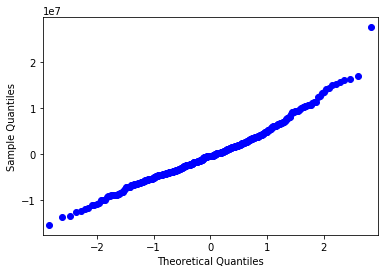

In [56]:
sm.qqplot(model_trn.resid);

Using our qq-plot, we can look at residuals. The residuals are fairly flat. There is an outlier on the top corner but overall the model looks like a decent fit for normal residuals.

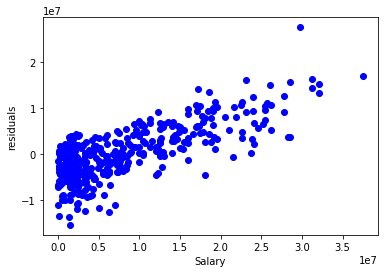

In [57]:
plt.plot(df.Salary, model_trn.resid, 'bo');
plt.xlabel('Salary')
plt.ylabel('residuals');

Looks like for the highest salary values, there seems to be a deviation for the model.

In [58]:
model_trn.f_test('AGE = MPG = FTM = PPG = RPG = APG = SPG = BPG = TOPG = 0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[42.30311091]]), p=4.2144805537552023e-54, df_denom=434, df_num=9>

The F-test shows that the combination of those factors have an effect in the model. Essentially that the combination of them are not equal to zero.

In [59]:
df.corr()

,AGE,MPG,FTM,PPG,RPG,APG,SPG,BPG,TOPG,Salary
AGE,1.000000,0.093752,0.000789,0.061834,0.016609,0.072198,-0.001622,-0.007968,0.022961,0.302550
MPG,0.093752,1.000000,0.690761,0.875779,0.622789,0.680184,0.712057,0.403399,0.766077,0.549090
FTM,0.000789,0.690761,1.000000,0.834210,0.598688,0.572859,0.522644,0.415125,0.698628,0.535197
PPG,0.061834,0.875779,0.834210,1.000000,0.594507,0.689470,0.637359,0.385897,0.824445,0.601655
RPG,0.016609,0.622789,0.598688,0.594507,1.000000,0.294840,0.385722,0.709238,0.531352,0.488176
APG,0.072198,0.680184,0.572859,0.689470,0.294840,1.000000,0.641156,0.098962,0.825966,0.430501
SPG,-0.001622,0.712057,0.522644,0.637359,0.385722,0.641156,1.000000,0.274325,0.631207,0.373342
BPG,-0.007968,0.403399,0.415125,0.385897,0.709238,0.098962,0.274325,1.000000,0.335218,0.324305
TOPG,0.022961,0.766077,0.698628,0.824445,0.531352,0.825966,0.631207,0.335218,1.000000,0.499764
Salary,0.302550,0.549090,0.535197,0.601655,0.488176,0.430501,0.373342,0.324305,0.499764,1.000000


In [60]:
x = df[['PPG','AGE','RPG','MPG','FTM','APG','SPG','BPG','TOPG']]
Y = df['Salary']
modelx = lm.LinearRegression()
modelx.fit(x,Y)
modely = modelx.predict(x)

print (modelx.coef_)
print ("y-int:", modelx.intercept_)
print ("mean squared error: ", mean_squared_error(Y,modely))
print ("r-squared: ", explained_variance_score(Y,modely))

[ 552408.13101926  487938.23204508  694376.46778434  -47783.19166911
    5816.20799848  529222.51795395 -211255.12235954  284288.93117454
 -771589.87249194]
y-int: -12612946.238941792
mean squared error:  31287482255182.746
r-squared:  0.46730687911045987


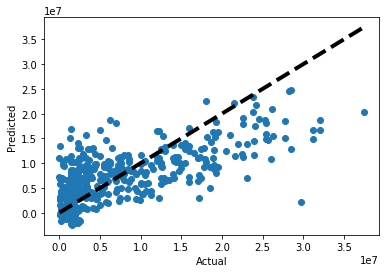

In [61]:
# Visualize actual vs. predictive

plt.subplots()
plt.scatter(Y,modely)
plt.plot([Y.min(),Y.max()],[Y.min(),Y.max()],'k--',lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

For mean squared error, we can see the plot here. For every single point, the distance from the points to the model will give us the mean squared error. Essentially, we want a low mean squared error since that means that our model is accurate. (ie. data is close to model) 

#### Try a few other combination of predictors...

In [62]:
model_a = smf.ols(formula = 'Salary~AGE+PPG+RPG',data = df).fit()
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     125.6
Date:                Sat, 10 Aug 2019   Prob (F-statistic):           9.24e-59
Time:                        16:04:52   Log-Likelihood:                -7531.0
No. Observations:                 444   AIC:                         1.507e+04
Df Residuals:                     440   BIC:                         1.509e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.32e+07   1.72e+06     -7.696      0.000   -1.66e+07   -9.83e+06
AGE         4.877e+05   6.32e+04      7.716      0.000    3.64e+05    6.12e+05
PPG         5.913e+05   5.61e+04     10.547      0.000    4.81e+05    7.01e+05
RPG         6.498e+05   1.35e+05      4.830      0.000    3.85e+05    9.14e+05
==============================================================================
Omnibus:                       42.435   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.915
Skew:                           0.627   Prob(JB):                     1.08e-15
Kurtosis:                       4.468   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model_b = smf.ols(formula = 'Salary~MPG+FTM+RPG+APG+SPG+TOPG',data = df).fit()
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     43.30
Date:                Sat, 10 Aug 2019   Prob (F-statistic):           1.83e-41
Time:                        16:04:52   Log-Likelihood:                -7564.7
No. Observations:                 444   AIC:                         1.514e+04
Df Residuals:                     437   BIC:                         1.517e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.239e+05   7.68e+05     -1.073      0.284   -2.33e+06    6.85e+05
MPG         1.959e+05   6.19e+04      3.163      0.002    7.42e+04    3.18e+05
FTM         1.759e+04   4859.017      3.619      0.000    8036.911    2.71e+04
RPG         6.334e+05    1.7e+05      3.721      0.000    2.99e+05    9.68e+05
APG         6.084e+05   3.24e+05      1.880      0.061   -2.75e+04    1.24e+06
SPG        -1.142e+06   9.54e+05     -1.197      0.232   -3.02e+06    7.33e+05
TOPG         -1.2e+05   7.77e+05     -0.154      0.877   -1.65e+06    1.41e+06
==============================================================================
Omnibus:                       60.254   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.538
Skew:                           0.819   Prob(JB):                     3.29e-23
Kurtosis:                       4.707   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let's try some other regression models...

In [64]:
# Trying Ridge Regression model 

y = df['Salary']
X = df.drop(['Salary'],axis=1)
reg = linear_model.Ridge (alpha = 0.1)
reg.fit(X,y)
reg_y = reg.predict(X)
print()
print (reg.coef_)
print ("y-int: ", reg.intercept_)
print ("mean squared error: ", mean_squared_error(y,reg_y))
print ("r-squared: ", explained_variance_score(y,reg_y))
    



[ 487950.87761607  -47763.74341308    5818.45235821  552277.22531478
  694314.58703827  528567.9997655  -210600.86461526  283289.29918562
 -769716.03690714]
y-int:  -12613425.61698084
mean squared error:  31287482777538.008
r-squared:  0.4673068702169654


There is a small moving backwards in terms of r squared value when compared to that of linear regression. (ie. not as good of a fit compared to linear regression model) The ridge model prevents multicollinearity by shrinking parameter. Essentially, all factors are retained but shrinks coefficients.

In [65]:
# Trying Lasso Regression Model

y = df['Salary']
X = df.drop(['Salary'],axis=1)
reg = linear_model.Lasso (alpha = 0.1)
reg.fit(X,y)
reg_y = reg.predict(X)
print()
print (reg.coef_)
print ("y-int:", reg.intercept_)
print ("mean squared error: ", mean_squared_error(y,reg_y))
print ("r-squared: ", explained_variance_score(y,reg_y))
    


[ 487938.24401827  -47783.19331675    5816.20975314  552408.04209132
  694376.52490622  529221.97291594 -211253.86406458  284287.39010518
 -771588.63898681]
y-int: -12612946.672056574
mean squared error:  31287482255183.207
r-squared:  0.4673068791104522


Although it is a small difference, there is an improvement of r squared value here as compared to the ridge model but it is still not as good as the linear model. This model is good as I have many factors and it automatically does factor selection. Essentially, for correlated variables, only one is retained and others are set to zero. (However, this could lead to info loss)

### Conclusion

My first hypothesis was that offensive and defensive production will clearly drop off as players age. In other words, there is negative correlation between age and both offensive and defensive statistics. I was wrong as indicated by my seaborn plots and correlation coefficients. (For example, correlation between age and PPG is only 0.062, which is very weak) My second hypothesis was that salary would increase as players get older in the NBA. This means that there is a positive correlation between salary and player's age. As shown by my regression plot and correlation values, age and salary does have weak positive correlation. (0.3 is the correlation value) Therefore, my second hypothesis is correct and supported by data analysis. Lastly, I beleive that I could use PPG and Age to predict salary. I am partly right as PPG and Age are indeed two of the most important factors for salary. However, other factors are still needed to obtain a better r squared value. Lastly, I experimented with factors in linear regression and tried other models. In this domain, the r squared value is certainly quite low so it's clear that my data is not good enough to predict salary.